In [1]:
import numpy as np # linear algebra
import os
from tensorflow import keras
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

In [2]:
path="/kaggle/input/fer13-cleaned-dataset/"

In [3]:
labels = ['fear', 'Angry', 'Neutral', 'disgust', 'Happy']

In [4]:
print("pre-processing data\n")

image_data=[]
label_data=[]
image_size=150

for i in labels:
    data_path=os.path.join("/kaggle/input/","fer13-cleaned-dataset",i)
    for m in tqdm(os.listdir(data_path)):
        image=cv2.imread(os.path.join(data_path,m))
        image=cv2.resize(image,(image_size,image_size))
        
        image_data.append(image)
        label_data.append(i)
        
image_data=np.array(image_data)
label_data=np.array(label_data)

pre-processing data



100%|██████████| 6834/6834 [00:27<00:00, 252.35it/s]


In [5]:
image_data,label_data=shuffle(image_data,label_data,random_state=42)

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(image_data,label_data,test_size=0.2,random_state=42)

In [7]:
train_label_data_new=[]
test_label_data_new=[]
for n in Y_train:
    train_label_data_new.append(labels.index(n))
Y_train=train_label_data_new
Y_train=to_categorical(Y_train)
    
for n in Y_test:
    test_label_data_new.append(labels.index(n))
Y_test=test_label_data_new
Y_test=to_categorical(Y_test)

In [8]:
Y_test

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [9]:
Y_train

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [10]:
vgg = VGG19(input_shape=(150,150,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(5, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,065,349 (76.54 MB)

 Trainable params: 40,965 (160.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [11]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [12]:
history=modelvgg.fit(X_train,Y_train,
 epochs=50,
 batch_size= 10,
 validation_data=(X_test,Y_test), callbacks=callback)

Epoch 1/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 73s 49ms/step - auc: 0.7150 - loss: 7.4168 - val_auc: 0.7533 - val_loss: 7.9973
Epoch 2/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 72s 54ms/step - auc: 0.8225 - loss: 4.8584 - val_auc: 0.7630 - val_loss: 9.0782
Epoch 3/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 71s 53ms/step - auc: 0.8520 - loss: 3.9727 - val_auc: 0.7719 - val_loss: 8.4414
Epoch 4/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 72s 54ms/step - auc: 0.8698 - loss: 3.5874 - val_auc: 0.7785 - val_loss: 9.2524
Epoch 5/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 72s 53ms/step - auc: 0.8803 - loss: 3.3846 - val_auc: 0.7721 - val_loss: 11.0871
Epoch 6/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 72s 54ms/step - auc: 0.8996 - loss: 2.7697 - val_auc: 0.7545 - val_loss: 11.4409
Epoch 7/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 72s 53ms/step - auc: 0.9061 - loss: 2.6887 - val_auc: 0.7625 - val_loss: 12.3269
Epoch 8/50
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 72s 53ms/step - auc: 0.9070 - loss: 2.6956 - val_auc: 0.7583 - val_loss: 13.0702
Epoch 9/50
1350/1350

In [13]:
loss, accuracy = modelvgg.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

422/422 ━━━━━━━━━━━━━━━━━━━━ 62s 122ms/step - auc: 0.8226 - loss: 4.6926
Train Loss:  4.669811725616455
Train Accuracy:  0.8268170952796936


In [14]:
loss, accuracy = modelvgg.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - auc: 0.7503 - loss: 8.2340
Test Loss:  7.997260093688965
Test Accuracy:  0.7532970905303955


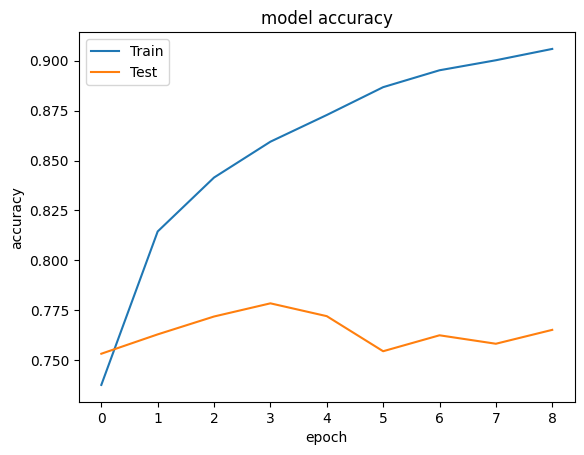

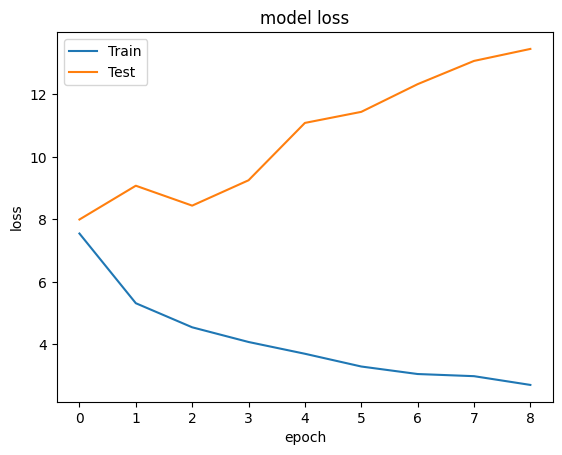

In [15]:
# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
predictions = modelvgg.predict(X_test)
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)

106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step
[[ 222   35  116   30  103]
 [ 117  116  116   47  163]
 [ 133   43  422   79  211]
 [  10    7    3   47   18]
 [  75   46  143   27 1047]]


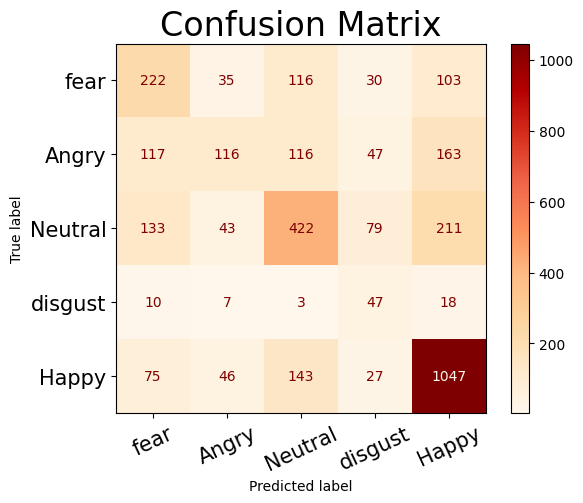

              precision    recall  f1-score   support

           0       0.40      0.44      0.42       506
           1       0.47      0.21      0.29       559
           2       0.53      0.48      0.50       888
           3       0.20      0.55      0.30        85
           4       0.68      0.78      0.73      1338

    accuracy                           0.55      3376
   macro avg       0.46      0.49      0.45      3376
weighted avg       0.55      0.55      0.54      3376



In [20]:
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()
print(classification_report(y_test, y_pred))